# Importing Libraries and Data

In [1]:
# for data manipulation
import pandas as pd
import numpy as np
#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
#for interactive plots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import plotly.express as px
import cufflinks as cf
init_notebook_mode(connected=True) #for notebooks
cf.go_offline() #for offline use

In [2]:
df=pd.read_csv('..//Pakistan Largest Ecommerce Dataset.csv')

C:\Users\samee\.conda\envs\mytfenv\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning:

Columns (1,2,3,7,8,9,11,12,13,14,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.



In [3]:
df=df.iloc[:584524,:21]

In [4]:
df.head()

item_id          status created_at  \
0  211131.0        complete   7/1/2016   
1  211133.0        canceled   7/1/2016   
2  211134.0        canceled   7/1/2016   
3  211135.0        complete   7/1/2016   
4  211136.0  order_refunded   7/1/2016   

                                                 sku   price  qty_ordered  \
0                                  kreations_YI 06-L  1950.0          1.0   
1  kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...   240.0          1.0   
2                                 Ego_UP0017-999-MR0  2450.0          1.0   
3                                     kcc_krone deal   360.0          1.0   
4                                        BK7010400AG   555.0          2.0   

   grand_total increment_id    category_name_1 sales_commission_code  ...  \
0       1950.0    100147443    Women's Fashion                    \N  ...   
1        240.0    100147444  Beauty & Grooming                    \N  ...   
2       2450.0    100147445    Women's Fashion                    \N  ...   
3         60.0    100147446  Beauty & Grooming           R-FSD-52352  ...   
4       1110.0    100147447            Soghaat                    \N  ...   

   payment_method Working Date BI Status      MV     Year  Month  \
0             cod     7/1/2016     #REF!   1,950   2016.0    7.0   
1             cod     7/1/2016     Gross     240   2016.0    7.0   
2             cod     7/1/2016     Gross   2,450   2016.0    7.0   
3             cod     7/1/2016       Net     360   2016.0    7.0   
4             cod     7/1/2016     Valid   1,110   2016.0    7.0   

   Customer Since     M-Y    FY Customer ID  
0          2016-7  7-2016  FY17         1.0  
1          2016-7  7-2016  FY17         2.0  
2          2016-7  7-2016  FY17         3.0  
3          2016-7  7-2016  FY17         4.0  
4          2016-7  7-2016  FY17         5.0  

[5 rows x 21 columns]

# Exploring Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584524 entries, 0 to 584523
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447349 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14   MV                    584524 non-nu

In [115]:
#let's change the data type of some columns
df['Year']=df['Year'].astype('str')

In [6]:
#let's start from description of data
df.describe()

item_id         price    qty_ordered   grand_total  \
count  584524.000000  5.845240e+05  584524.000000  5.845240e+05   
mean   565667.074218  6.348748e+03       1.296388  8.530619e+03   
std    200121.173648  1.494927e+04       3.996061  6.132081e+04   
min    211131.000000  0.000000e+00       1.000000 -1.594000e+03   
25%    395000.750000  3.600000e+02       1.000000  9.450000e+02   
50%    568424.500000  8.990000e+02       1.000000  1.960400e+03   
75%    739106.250000  4.070000e+03       1.000000  6.999000e+03   
max    905208.000000  1.012626e+06    1000.000000  1.788800e+07   

       discount_amount           Year          Month    Customer ID  
count    584524.000000  584524.000000  584524.000000  584513.000000  
mean        499.492775    2017.044115       7.167654   45790.511965  
std        1506.943046       0.707355       3.486305   34414.962389  
min        -599.500000    2016.000000       1.000000       1.000000  
25%           0.000000    2017.000000       4.000000   13516.000000  
50%           0.000000    2017.000000       7.000000   42856.000000  
75%         160.500000    2018.000000      11.000000   73536.000000  
max       90300.000000    2018.000000      12.000000  115326.000000

In [7]:
df['created_at']

0          7/1/2016
1          7/1/2016
2          7/1/2016
3          7/1/2016
4          7/1/2016
            ...    
584519    8/28/2018
584520    8/28/2018
584521    8/28/2018
584522    8/28/2018
584523    8/28/2018
Name: created_at, Length: 584524, dtype: object

The date is not in the format which most of the libraries like to use. We will convert the date into format of year-month-day for smooth analysis.

In [8]:
def date_fixer(x):
    split=x.split('/')
    mon=split[0]
    day=split[1]
    yr=split[2]
    if len(mon) == 1:
        mon='0'+mon
    if len(day) == 1:
        day='0'+day
    return yr+'-'+mon+'-'+day

In [9]:
df['created_at']=df['created_at'].apply(date_fixer)
df=df.sort_values('created_at')

In [11]:
#let's explore the status column
df['status'].value_counts()

complete          233685
canceled          201249
received           77290
order_refunded     59529
refund              8050
cod                 2859
paid                1159
closed               494
payment_review        57
pending               48
processing            33
holded                31
fraud                 10
pending_paypal         7
exchange               4
\N                     4
Name: status, dtype: int64

Seems like it has alot of repeated categories. These too many categories will hurdle us in visualizing, so let us make 4 broader categories.

Let us group complete, received, cod, paid, closed as Completed. order_refunded, refund, exchange will be categorize as Refunded. pending, payment_review, processing, holded, pending_paypal will be grouped as Pending. Canceled will be compiled in Canceled category. Since the number of rows with fraud and \n category has very less value, we will include them in canceled category.

In [59]:
df['status'].replace(['complete','received','cod','paid','closed'],'completed',inplace=True)
df['status'].replace(['order_refunded','refund','exchange'],'refunded',inplace=True)
df['status'].replace(['pending','payment_review','processing','holded','pending_paypal'],'pending',inplace=True)
df['status'].replace(['canceled','fraud',r'\N'],'canceled',inplace=True)

In [60]:
df['status'].value_counts()

completed    315487
canceled     201263
refunded      67583
pending         176
Name: status, dtype: int64

Great! The data is in correct format now.

## Discount vs Sell

Firstly, we will try to answer whether the sell increases with the increase in the discount amount.

In [61]:
dfn=df.groupby('created_at')[['grand_total','qty_ordered','discount_amount']].sum().reset_index()

In [62]:
dfc=df.groupby('created_at')['status'].count().reset_index()

In [63]:
dff=pd.merge(dfn,dfc)

In [64]:
#let's check if there is spikes in daily sales with respect to the discount
dff.set_index('created_at')[['grand_total','discount_amount']].iplot()

Conclusion: Amazing! as we anticipated. The sales indeed have increased with the increase in the amount of discount.

Let's check if the story is true for cumulative sum too or not.

In [65]:
dff['cum_grand_sum']=dff['grand_total'].cumsum()

In [66]:
dff['cum_discount_sum']=dff['discount_amount'].cumsum()

In [67]:
dff.set_index('created_at')[['cum_grand_sum','cum_discount_sum']].iplot()

Yes! The sales have skyrocketted with the increasing discount. However, before making any judgement we need to confirm how many of these orders got completed to comment on the increased sale. Let's sneak into individual status categories.

In [68]:
df1=df.groupby(['Year','status']).sum().reset_index()

In [69]:
px.bar(df1,x='Year',y='grand_total',color='status', title='Yearly Categorization of Status')

There is a huge chunk of orders that got cancelled. We need to drop them to see what is the real picture of orders being increased due to discount.

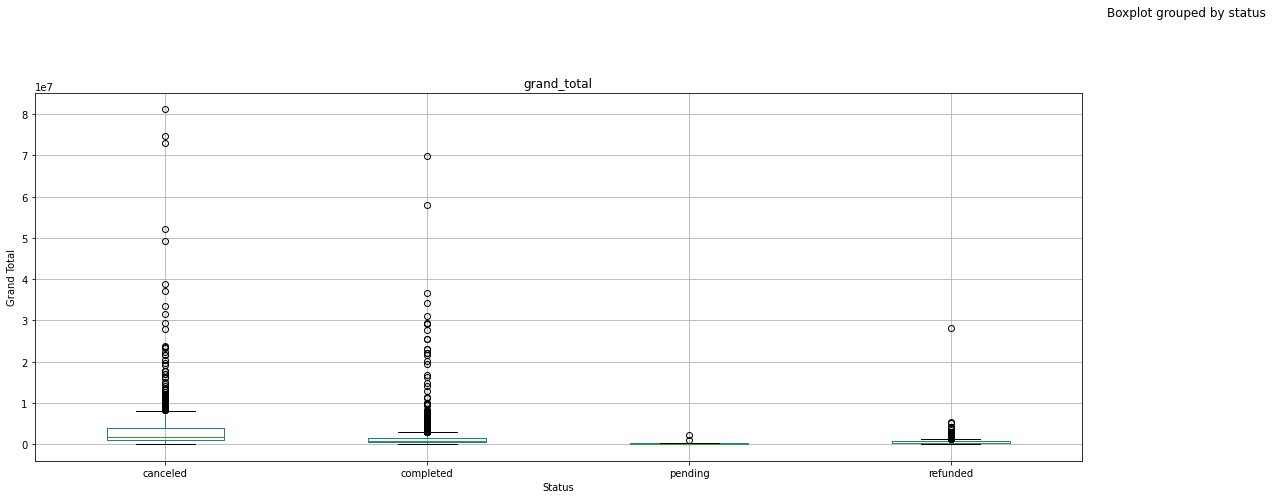

In [70]:
#to check how these categories are distibuted
dft=df.groupby(['created_at','status']).sum().reset_index()
fig = plt.figure(figsize=(40,15))
ax_1 = fig.add_subplot(221);
dft.boxplot(column='grand_total',by='status',ax=ax_1)
ax_1.set_xlabel("Status");
ax_1.set_ylabel("Grand Total");

Let's check the collective worth or grand total of all these status categories

In [71]:
dft=df1.groupby('status').sum().reset_index()

In [72]:
fig=px.bar(dft,x='status',y='grand_total',text='grand_total')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

Almost Rs. 2.9B of orders have been cancelled. Only orders of worth Rs. 1.6B have been completed.

We need to drop these cancelled orders to see the real picture

In [73]:
dft=df[df.status=='completed'].groupby('created_at').sum().reset_index()

In [76]:
fig=go.Figure()

fig.add_trace(go.Scatter(x=dft['created_at'],y=dft['grand_total'],mode='lines+markers',name='grand_total'))
fig.add_trace(go.Scatter(x=dft['created_at'],y=dft['discount_amount'],mode='lines+markers',name='discount_amount'))

Luckily the trend is preserved. There is indeed spikes in order with the increase in the discount amount.

## Categories

Now it is time to answer which category is hot and driven most audience.

In [77]:
dft=df.groupby('category_name_1').sum().reset_index()

In [78]:
fig=px.bar(dft,x='category_name_1',y='grand_total',text='grand_total')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

Seems like Mobiles & Tablets is the hottest category. But, we know, there is a huge chunk of cancelled orders. Let's check out of these orders, how many were cancelled or completed.

In [80]:
dft=df.groupby(['category_name_1','status']).sum().reset_index()

In [81]:
px.bar(dft,x='category_name_1',y='grand_total',color='status',barmode='group')

For almost every category, the number of orders that got canceled are greater than the one which got completed.

The top categories with the completed orders are:

In [83]:
dft[dft.status == 'completed'].set_index('category_name_1')['grand_total'].sort_values(ascending=False)

category_name_1
Mobiles & Tablets     6.131490e+08
Appliances            2.370856e+08
Entertainment         1.928798e+08
Women's Fashion       1.457730e+08
Men's Fashion         8.901637e+07
Superstore            6.067131e+07
Others                5.879390e+07
Beauty & Grooming     5.013202e+07
Computing             4.909160e+07
Home & Living         4.206294e+07
Soghaat               2.649809e+07
Kids & Baby           2.176329e+07
Health & Sports       2.158192e+07
\N                    1.869671e+07
School & Education    3.282045e+06
Books                 1.621492e+06
Name: grand_total, dtype: float64

## Payment Methods

In [84]:
dft=df.groupby('payment_method')['grand_total'].sum().reset_index()

In [85]:
fig=px.bar(dft,x='payment_method',y='grand_total',text='grand_total')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

## Quantity Ordered

For this, we will get rid of all the canceled orders.

In [194]:
df_clean=df[df.status != 'canceled']

In [195]:
dft = df_clean.groupby(['created_at' ,'category_name_1', 'status'])['qty_ordered'].sum().reset_index()
px.scatter(dft, x="created_at", y="qty_ordered", color="status", size="qty_ordered", hover_data=['category_name_1','status'])

## Payment method and Status

Since we have 16 unique status options and 18 unique payment_method, it is better to create a matrix to show the correlation then to create graphs.

In [196]:
df.pivot_table(index=['status'],columns=['payment_method'],values='item_id',aggfunc='count')

payment_method  Easypay  Easypay_MA  Payaxis     apg  bankalfalah  \
status                                                              
canceled        52040.0      9210.0  61276.0  1361.0      16184.0   
completed       27507.0      4359.0  31987.0   352.0       5940.0   
pending             2.0         NaN     12.0     NaN         80.0   
refunded         3351.0       459.0   4366.0    45.0        860.0   

payment_method  cashatdoorstep       cod  customercredit  easypay_voucher  \
status                                                                      
canceled                   5.0   21757.0            47.0          12189.0   
completed                679.0  195813.0          6013.0          18233.0   
pending                    NaN      33.0             3.0             33.0   
refunded                  48.0   54343.0          1492.0            721.0   

payment_method  financesettlement  internetbanking  jazzvoucher  jazzwallet  \
status                                                                        
canceled                      1.0            286.0       8472.0     16933.0   
completed                     9.0            160.0       6620.0     17084.0   
pending                       NaN              NaN         12.0         1.0   
refunded                      5.0             26.0        529.0      1127.0   

payment_method  marketingexpense  mcblite  mygateway  productcredit  \
status                                                                
canceled                     NaN    179.0      652.0           10.0   
completed                   44.0    396.0       14.0           85.0   
pending                      NaN      NaN        NaN            NaN   
refunded                     1.0    148.0        3.0           30.0   

payment_method  ublcreditcard  
status                         
canceled                661.0  
completed               192.0  
pending                   NaN  
refunded                 29.0

<AxesSubplot:xlabel='payment_method', ylabel='status'>

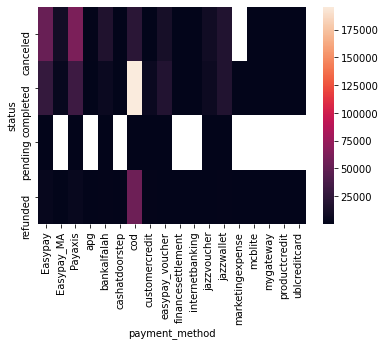

In [89]:
sns.heatmap(df.pivot_table(index=['status'],columns=['payment_method'],values='item_id',aggfunc='count'))

This tells Cash On Delivery is the best option for the customers. It has strong correlation with the completed order. However, it is not perfect. It too have relatively high refund and cancellation rate than other payment methods.

Let's explore how the payment trends of people have been changed through years. Have people really shifted towards digital payment options?

In [198]:
df['Year'].value_counts()

2017    290920
2018    159695
2016    133909
Name: Year, dtype: int64

In [199]:
dft=df.groupby(['Year','payment_method']).size().reset_index(name='count')

In [200]:
px.bar(dft,x='Year',y='count',color='payment_method')

The trend is not too much visible, let's split the data into two categories of either digital payment or cod.

In [201]:
dft=df.replace(np.delete(df['payment_method'].unique(),0),'digital_payment')

In [202]:
dftt=dft.groupby(['Year','payment_method']).size().reset_index(name='count')

In [203]:
px.bar(dftt,x='Year',y='count',color='payment_method')

In [204]:
#by market size
dft=dft.groupby(['Year','payment_method']).sum()['grand_total'].reset_index(name='volume')

In [205]:
px.bar(dft,x='Year',y='volume',color='payment_method')

Indeed. People have developed more trust on digital methods over years.

In [207]:
dftt

Year   payment_method   count
0  2016              cod   76741
1  2016  digital_payment   57168
2  2017              cod  139987
3  2017  digital_payment  150933
4  2018              cod   55232
5  2018  digital_payment  104463